In [ ]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline
import nltk

import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.svm import LinearSVR
from sklearn.neighbors import KNeighborsRegressor
import xgboost as xg
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.ensemble import BaggingRegressor

<h1><b>Load Dataset</b></h1>

In [ ]:
ds = pd.read_csv("ALL Prices 1990-2021 mar.csv")

In [ ]:
ds.head()

,month,year,town,town_dummy,flat_type,block,street_name,address,latitude,longitude,...,price_psm_yearly,Core CPI,price cpi_adj,price_psm cpi_adj,bala lease pct,price lease_adj implied,price_psm lease_adj implied,price cpi_lease_adj implied,price_psm cpi_lease_adj implied,year_gni
0,1990-01,1990,ANG MO KIO,2,4 ROOM,308,ANG MO KIO AVE 1,308 ANG MO KIO AVE 1 SINGAPORE,1.365485,103.844025,...,10.997442,61.59,139633.05730,1517.750623,92.9,88869.75242,965.975570,144292.50270,1568.396769,22901
1,1990-01,1990,ANG MO KIO,2,3 ROOM,308,ANG MO KIO AVE 1,308 ANG MO KIO AVE 1 SINGAPORE,1.365485,103.844025,...,8.464849,61.59,95794.77188,1168.228925,92.9,60968.78364,743.521752,98991.36814,1207.211806,22901
2,1990-01,1990,ANG MO KIO,2,3 ROOM,216,ANG MO KIO AVE 1,216 ANG MO KIO AVE 1 SINGAPORE,1.366272,103.841465,...,7.606769,61.59,76635.81750,1049.805719,92.9,48775.02691,668.151054,79193.09451,1084.836911,22901
3,1990-01,1990,ANG MO KIO,2,3 ROOM,308,ANG MO KIO AVE 1,308 ANG MO KIO AVE 1 SINGAPORE,1.365485,103.844025,...,8.287972,61.59,76635.81750,1143.818172,92.9,48775.02691,727.985476,79193.09451,1181.986486,22901
4,1990-01,1990,ANG MO KIO,2,4 ROOM,211,ANG MO KIO AVE 3,211 ANG MO KIO AVE 3 SINGAPORE,1.369226,103.841652,...,11.484353,61.59,129891.21610,1603.595261,93.3,82315.11254,1016.235957,133650.12590,1650.001555,22901


In [ ]:
ds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 840918 entries, 0 to 840917
Data columns (total 28 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   month                            840918 non-null  object 
 1   year                             840918 non-null  int64  
 2   town                             840918 non-null  object 
 3   town_dummy                       840918 non-null  int64  
 4   flat_type                        840918 non-null  object 
 5   block                            840918 non-null  object 
 6   street_name                      840918 non-null  object 
 7   address                          840918 non-null  object 
 8   latitude                         840918 non-null  float64
 9   longitude                        840918 non-null  float64
 10  storey_range                     840918 non-null  object 
 11  storey                           840918 non-null  int64  
 12  ar

In [ ]:
ds.isnull().sum()

month                              0
year                               0
town                               0
town_dummy                         0
flat_type                          0
block                              0
street_name                        0
address                            0
latitude                           0
longitude                          0
storey_range                       0
storey                             0
area_sqm                           0
flat_model                         0
lease_start                        0
lease_rem                          0
resale_price                       0
price_psm                          0
price_psm_yearly                   0
Core CPI                           0
price cpi_adj                      0
price_psm cpi_adj                  0
bala lease pct                     0
price lease_adj implied            0
price_psm lease_adj implied        0
price cpi_lease_adj implied        0
price_psm cpi_lease_adj implied    0
y

<h1><b>EDA</b></h1>

<h2><b>Test different types of encoding</b></h2>

<h4><b>a. Label Encoding</b></h4>

In [ ]:
# Label encode flat_type
ds_prelim = ds[['town_dummy','flat_type','storey','area_sqm','flat_model','lease_rem','resale_price','year_gni']]
ds_prelim['flat_type'].replace(['4 ROOM', '3 ROOM', '1 ROOM', '5 ROOM', 'EXECUTIVE', '2 ROOM','MULTI GENERATION'],
                             [4, 3, 1, 5, 7, 2, 6], inplace=True)

# make all values of flat_model lower case
ds_prelim['flat_model'] = ds_prelim['flat_model'].map(str.lower)

# label encode flat model because it has 20 variables
# creating instance of labelencoder
labelencoder = LabelEncoder()
# Assigning numerical values and storing in another column
ds_prelim['new_flat_model'] = ds_prelim['flat_model']
ds_prelim['flat_model'] = labelencoder.fit_transform(ds_prelim['flat_model'])

ds_prelim.head()

C:\Users\euanc\AppData\Local\Temp\ipykernel_6992\3921447390.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_prelim['flat_type'].replace(['4 ROOM', '3 ROOM', '1 ROOM', '5 ROOM', 'EXECUTIVE', '2 ROOM','MULTI GENERATION'],
C:\Users\euanc\AppData\Local\Temp\ipykernel_6992\3921447390.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ds_prelim['flat_model'] = ds_prelim['flat_model'].map(str.lower)
C:\Users\euanc\AppData\Local\Temp\ipykernel_6992\3921447390.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try us

,town_dummy,flat_type,storey,area_sqm,flat_model,lease_rem,resale_price,year_gni,new_flat_model
0,2,4,11,92.0,11,85,86000.0,22901,new generation
1,2,3,8,82.0,11,85,59000.0,22901,new generation
2,2,3,5,73.0,11,85,47200.0,22901,new generation
3,2,3,11,67.0,11,85,47200.0,22901,new generation
4,2,4,5,81.0,11,86,80000.0,22901,new generation


In [ ]:
ds_prelim['flat_model'].unique()

array([11,  4, 16,  7,  2,  6,  8, 15, 17,  0,  5, 10, 12,  1, 14,  9,  3,
       18, 19, 13])

In [ ]:
# drop new_flat_model
ds_test = ds_prelim.drop(columns = ['new_flat_model'])
ds_test.head()

,town_dummy,flat_type,storey,area_sqm,flat_model,lease_rem,resale_price,year_gni
0,2,4,11,92.0,11,85,86000.0,22901
1,2,3,8,82.0,11,85,59000.0,22901
2,2,3,5,73.0,11,85,47200.0,22901
3,2,3,11,67.0,11,85,47200.0,22901
4,2,4,5,81.0,11,86,80000.0,22901


In [ ]:
ds_test.describe()

,town_dummy,flat_type,storey,area_sqm,flat_model,lease_rem,resale_price,year_gni
count,840918.000000,840918.000000,840918.000000,840918.000000,840918.000000,840918.000000,8.409180e+05,840918.000000
mean,3.892261,4.079841,7.567124,95.608704,8.028203,81.780300,2.968002e+05,49518.956025
std,1.403197,1.129565,4.657776,26.026266,3.889281,9.959341,1.509764e+05,15844.785659
min,1.000000,1.000000,2.000000,28.000000,0.000000,45.000000,5.000000e+03,22901.000000
25%,2.000000,3.000000,5.000000,73.000000,4.000000,75.000000,1.830000e+05,37363.000000
50%,4.000000,4.000000,8.000000,93.000000,7.000000,83.000000,2.780000e+05,40870.000000
75%,5.000000,5.000000,11.000000,114.000000,11.000000,90.000000,3.870000e+05,63712.000000
max,6.000000,7.000000,50.000000,307.000000,19.000000,101.000000,1.258000e+06,79517.000000


In [ ]:
print(ds_test.cov())

               town_dummy      flat_type         storey      area_sqm  \
town_dummy       1.968961       0.327040      -0.479016  8.951894e+00   
flat_type        0.327040       1.275916       0.335027  2.745772e+01   
storey          -0.479016       0.335027      21.694879  6.160143e+00   
area_sqm         8.951894      27.457724       6.160143  6.773665e+02   
flat_model      -0.553812      -1.671255      -1.476317 -4.206009e+01   
lease_rem        4.197799       3.760243       2.727874  9.834655e+01   
resale_price -4825.608513  106024.185651  154319.743976  2.431931e+06   
year_gni      1418.265950    1601.178444    6151.239543  2.721005e+04   

                 flat_model     lease_rem  resale_price      year_gni  
town_dummy        -0.553812      4.197799 -4.825609e+03  1.418266e+03  
flat_type         -1.671255      3.760243  1.060242e+05  1.601178e+03  
storey            -1.476317      2.727874  1.543197e+05  6.151240e+03  
area_sqm         -42.060094     98.346553  2.431931e+0

In [ ]:
ds_test.skew() # before transformation

town_dummy     -0.318724
flat_type       1.034547
storey          1.226703
area_sqm        0.375478
flat_model      0.487521
lease_rem      -0.666881
resale_price    0.830437
year_gni        0.482955
dtype: float64

In [ ]:
# log transformation to remove skew
ds_test['flat_type'] = np.log(ds_test['flat_type'])
ds_test['storey'] = np.log(ds_test['storey'])

In [ ]:
ds_test.skew() # after transformation

town_dummy     -0.318724
flat_type       0.168391
storey         -0.413495
area_sqm        0.375478
flat_model      0.487521
lease_rem      -0.666881
resale_price    0.830437
year_gni        0.482955
dtype: float64

<h4><b>b. Target Encoding</b></h4>

In [ ]:
# target encode flat_type
tenc=ce.TargetEncoder()
ds_prelim2 = ds[['town_dummy','flat_type','storey','area_sqm','flat_model','lease_rem','resale_price','year_gni']]
ds_flattype = tenc.fit_transform(ds_prelim2['flat_type'], ds_prelim2['resale_price'])
ds_prelim2 = ds_flattype.join(ds_prelim2.drop('flat_type', axis=1))

# make all values of flat_model lower case
ds_prelim2['flat_model'] = ds_prelim2['flat_model'].map(str.lower)

# target encode flat_model
ds_flatmodel = tenc.fit_transform(ds_prelim2['flat_model'], ds_prelim2['resale_price'])
ds_prelim2 = ds_flatmodel.join(ds_prelim2.drop('flat_model', axis=1))

ds_prelim2.head()

,flat_model,flat_type,town_dummy,storey,area_sqm,lease_rem,resale_price,year_gni
0,211879.389796,300530.759556,2,11,92.0,85,86000.0,22901
1,211879.389796,188367.797463,2,8,82.0,85,59000.0,22901
2,211879.389796,188367.797463,2,5,73.0,85,47200.0,22901
3,211879.389796,188367.797463,2,11,67.0,85,47200.0,22901
4,211879.389796,300530.759556,2,5,81.0,86,80000.0,22901


In [ ]:
ds_test2 = ds_prelim2
ds_test2.head()

,flat_model,flat_type,town_dummy,storey,area_sqm,lease_rem,resale_price,year_gni
0,211879.389796,300530.759556,2,11,92.0,85,86000.0,22901
1,211879.389796,188367.797463,2,8,82.0,85,59000.0,22901
2,211879.389796,188367.797463,2,5,73.0,85,47200.0,22901
3,211879.389796,188367.797463,2,11,67.0,85,47200.0,22901
4,211879.389796,300530.759556,2,5,81.0,86,80000.0,22901


In [ ]:
ds_test2.describe()

,flat_model,flat_type,town_dummy,storey,area_sqm,lease_rem,resale_price,year_gni
count,8.409180e+05,840918.000000,840918.000000,840918.000000,840918.000000,840918.000000,8.409180e+05,840918.000000
mean,2.967999e+05,296800.207343,3.892261,7.567124,95.608704,81.780300,2.968002e+05,49518.956025
std,7.852260e+04,96738.915648,1.403197,4.657776,26.026266,9.959341,1.509764e+05,15844.785659
min,1.579532e+05,63664.520312,1.000000,2.000000,28.000000,45.000000,5.000000e+03,22901.000000
25%,2.220786e+05,188367.797463,2.000000,5.000000,73.000000,75.000000,1.830000e+05,37363.000000
50%,3.033016e+05,300530.759556,4.000000,8.000000,93.000000,83.000000,2.780000e+05,40870.000000
75%,3.091369e+05,402661.322285,5.000000,11.000000,114.000000,90.000000,3.870000e+05,63712.000000
max,1.021241e+06,509057.761252,6.000000,50.000000,307.000000,101.000000,1.258000e+06,79517.000000


In [ ]:
print(ds_test2.cov())

                flat_model     flat_type    town_dummy         storey  \
flat_model    6.165798e+09  4.560976e+09  17362.095997   36927.871166   
flat_type     4.560976e+09  9.358418e+09  30109.913496   40084.683484   
town_dummy    1.736210e+04  3.010991e+04      1.968961      -0.479016   
storey        3.692787e+04  4.008468e+04     -0.479016      21.694879   
area_sqm      1.264070e+06  2.398200e+06      8.951894       6.160143   
lease_rem     2.171675e+05  3.590459e+05      4.197799       2.727874   
resale_price  6.166457e+09  9.358418e+09  -4825.608513  154319.743976   
year_gni      2.007712e+08  1.642283e+08   1418.265950    6151.239543   

                  area_sqm      lease_rem  resale_price      year_gni  
flat_model    1.264070e+06  217167.502185  6.166457e+09  2.007712e+08  
flat_type     2.398200e+06  359045.899298  9.358418e+09  1.642283e+08  
town_dummy    8.951894e+00       4.197799 -4.825609e+03  1.418266e+03  
storey        6.160143e+00       2.727874  1.543197e+0

In [ ]:
ds_test2.skew() # before transformation

flat_model      1.619697
flat_type       0.309742
town_dummy     -0.318724
storey          1.226703
area_sqm        0.375478
lease_rem      -0.666881
resale_price    0.830437
year_gni        0.482955
dtype: float64

In [ ]:
# log transformation to remove skew
ds_test2['flat_model'] = np.log(ds_test2['flat_model'])
ds_test2['storey'] = np.log(ds_test2['storey'])

In [ ]:
ds_test2.skew() # after transformation

flat_model      0.601869
flat_type       0.309742
town_dummy     -0.318724
storey         -0.413495
area_sqm        0.375478
lease_rem      -0.666881
resale_price    0.830437
year_gni        0.482955
dtype: float64

<h1><b>Data Visualisation</b></h1>

array([[<Axes: title={'center': 'town_dummy'}>,
        <Axes: title={'center': 'flat_type'}>,
        <Axes: title={'center': 'storey'}>],
       [<Axes: title={'center': 'area_sqm'}>,
        <Axes: title={'center': 'flat_model'}>,
        <Axes: title={'center': 'lease_rem'}>],
       [<Axes: title={'center': 'resale_price'}>,
        <Axes: title={'center': 'year_gni'}>, <Axes: >]], dtype=object)

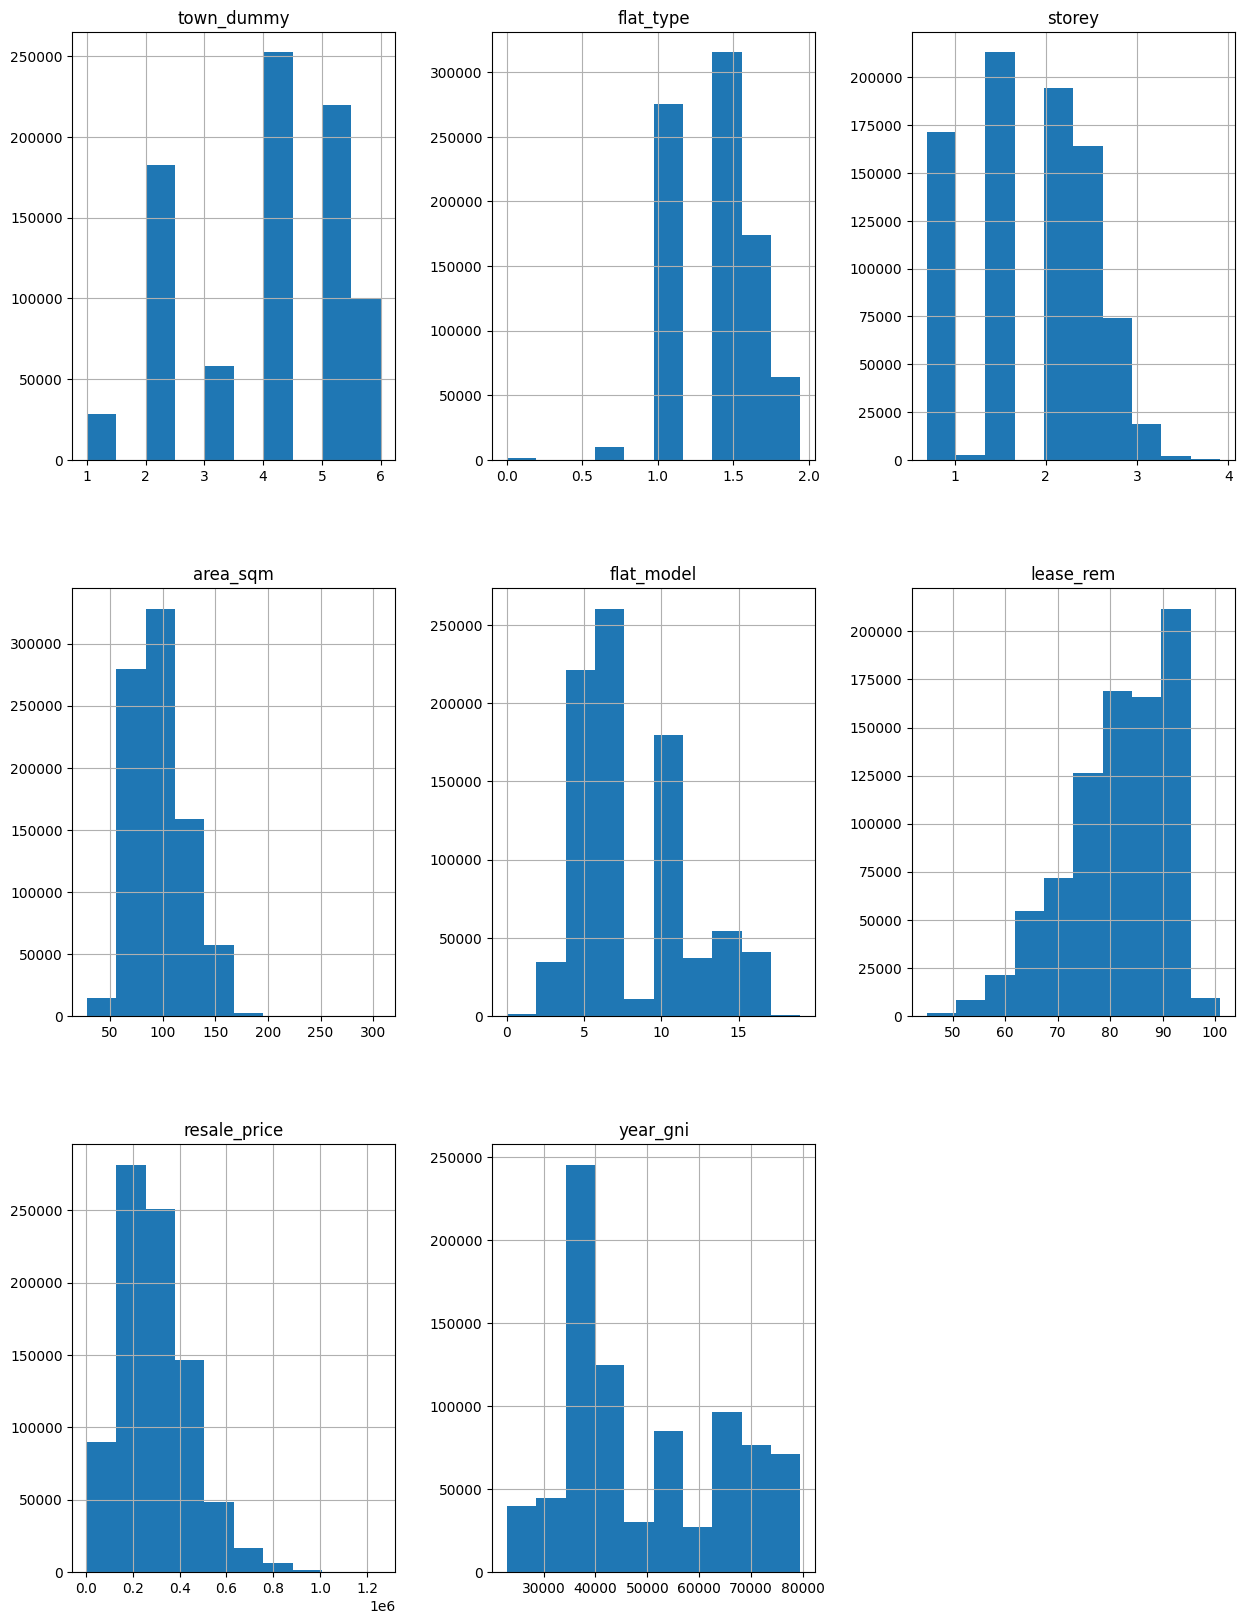

In [ ]:
ds_test.hist(figsize = (15,20))

In [ ]:
ds_test2.hist(figsize = (15,20))

In [ ]:
sns.heatmap(ds_test.corr(), annot= True, cmap = 'coolwarm')

In [ ]:
sns.heatmap(ds_test2.corr(), annot= True, cmap = 'coolwarm')

In [ ]:
#visualising location based on latitude & longtitude 

plt.figure(figsize =(10,10))
sns.jointplot(data=ds, x='latitude', y='longitude', size=10)
plt.ylabel('Longtitude', fontsize=12)
plt.xlabel('Latitude', fontsize=12)
plt.show()
sns.despine

In [ ]:
#how location of a house affect the relase_price 
plt.scatter(ds.longitude, ds.resale_price)
plt.title('Resale Price vs Area Location')
plt.ylabel('Resale Price')
plt.xlabel('Longitude')
plt.show()

#should we add more of these? 

In [ ]:
#how area_sqm affect the resale_proice 
plt.scatter(ds.area_sqm,ds.resale_price) 
plt.title('Resale Price vs Area Sqm')
plt.xlabel('Area Sqm')
plt.ylabel('Resale Price')

plt.show()

<h1><b>Split Datasets for Regression Modelling</b></h1>

In [ ]:
ds_test.head()

,town_dummy,flat_type,storey,area_sqm,flat_model,lease_rem,resale_price,year_gni
0,2,1.386294,2.397895,92.0,11,85,86000.0,22901
1,2,1.098612,2.079442,82.0,11,85,59000.0,22901
2,2,1.098612,1.609438,73.0,11,85,47200.0,22901
3,2,1.098612,2.397895,67.0,11,85,47200.0,22901
4,2,1.386294,1.609438,81.0,11,86,80000.0,22901


In [ ]:
ds_test2.head()

,flat_model,flat_type,town_dummy,storey,area_sqm,lease_rem,resale_price,year_gni
0,12.263772,300530.759556,2,2.397895,92.0,85,86000.0,22901
1,12.263772,188367.797463,2,2.079442,82.0,85,59000.0,22901
2,12.263772,188367.797463,2,1.609438,73.0,85,47200.0,22901
3,12.263772,188367.797463,2,2.397895,67.0,85,47200.0,22901
4,12.263772,300530.759556,2,1.609438,81.0,86,80000.0,22901


In [ ]:
# split dataset into independent variables and depdendent variables
X = ds_test[['town_dummy', 'flat_type', 'storey', 'area_sqm', 'flat_model', 'lease_rem', 'year_gni']]
y = ds_test['resale_price']
X2 = ds_test2[['town_dummy', 'flat_type', 'storey', 'area_sqm', 'flat_model', 'lease_rem', 'year_gni']]
y2 = ds_test2['resale_price']

In [ ]:
# split dataset into training and testing datasets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 101)
X2_train, X2_test, y2_train, y2_test = train_test_split(X2, y2, test_size = 0.2, random_state = 101)

<h1><b>Create Base Linear Regression Model</b></h1>

<H3><B>Linear Regression Model</B></H3>

In [ ]:
# creation of a LinearRegression object 
lm = LinearRegression()
lm2 = LinearRegression()

# calling the fit() function of the `LinearRegression` class
# the fit() function fits (creates) the linear model
lm.fit(X_train, y_train)
lm2.fit(X2_train, y2_train)

y_pred = lm.predict(X_test)
y2_pred = lm2.predict(X2_test)

print(pd.DataFrame(lm.coef_,X.columns, columns=['Coefficients']))
print('\n')
print(pd.DataFrame(lm2.coef_,X2.columns, columns=['Coefficients']))

            Coefficients
town_dummy -25937.537166
flat_type   89836.303705
storey      17353.727289
area_sqm     2508.952559
flat_model   -304.500524
lease_rem    1917.800152
year_gni        6.240300


            Coefficients
town_dummy -25521.264403
flat_type       0.272547
storey      16620.931816
area_sqm     2226.250567
flat_model  40623.740184
lease_rem    1675.398940
year_gni        6.074884


In [ ]:
mse = mean_squared_error(y_test, y_pred)
mse2 = mean_squared_error(y2_test, y2_pred)
rmse = np.sqrt(mse)
rmse2 = np.sqrt(mse2)

r_squared = r2_score(y_test, y_pred)
r_squared2 = r2_score(y2_test, y2_pred)

print("linear regression (label encoded) r-squared: ", r_squared)
print("linear regression (label encoded) rmse: ", rmse)
print("linear regression (target encoded) r-squared: ", r_squared2)
print("linear regression (target encoded) rmse: ", rmse2)

linear regression (label encoded) r-squared:  0.7975901702598682
linear regression (label encoded) rmse:  67862.56405229034
linear regression (target encoded) r-squared:  0.8000380245405145
linear regression (target encoded) rmse:  67450.96604230112


<h1><b>Create Different Regression Models to find best one</b></h1>

<H3><B>1. Decision Tree</B></H3>

In [ ]:
dec_tree = DecisionTreeRegressor(criterion='squared_error', splitter='best',
                                  min_samples_split=50, max_features='auto', random_state=101)
dec_tree.fit(X_train, y_train)
pred_dec_tree = dec_tree.predict(X_test)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [ ]:
dec_tree2 = DecisionTreeRegressor(criterion='squared_error', splitter='best',
                                  min_samples_split=50, max_features='auto', random_state=101)
dec_tree2.fit(X2_train, y2_train)
pred_dec_tree2 = dec_tree2.predict(X2_test)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/tree/_classes.py:277: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0'`.
  warnings.warn(


In [ ]:
pred_dec_tree

array([198416.66666667,  80310.34482759, 431507.52      , ...,
       251649.75      , 131352.94117647, 114553.06122449])

In [ ]:
pred_dec_tree2

array([198416.66666667,  80310.34482759, 431507.52      , ...,
       251649.75      , 131352.94117647, 114861.9047619 ])

In [ ]:
dec_tree_mse = mean_squared_error(y_test, pred_dec_tree)
dec_tree_mse2 = mean_squared_error(y2_test, pred_dec_tree2)
dec_tree_rmse = np.sqrt(dec_tree_mse)
dec_tree_rmse2 = np.sqrt(dec_tree_mse2)

dec_tree_r_squared = r2_score(y_test, pred_dec_tree)
dec_tree_r_squared2 = r2_score(y2_test, pred_dec_tree2)

print("decision tree (label encoded) r-squared: ", dec_tree_r_squared)
print("decision tree (label encoded) rmse: ", dec_tree_rmse)
print("decision tree (target encoded) r-squared: ", dec_tree_r_squared2)
print("decision tree (target encoded) rmse: ", dec_tree_rmse2)

decision tree (label encoded) r-squared:  0.9565397162248676
decision tree (label encoded) rmse:  31445.6621193831
decision tree (target encoded) r-squared:  0.956794341871544
decision tree (target encoded) rmse:  31353.409681899284


In [ ]:
# compare results
print("linear regression (label encoded) r-squared: ", r_squared)
print("linear regression (label encoded) rmse: ", rmse)
print("linear regression (target encoded) r-squared: ", r_squared2)
print("linear regression (target encoded) rmse: ", rmse2)
print('\n')
print("decision tree (label encoded) r-squared: ", dec_tree_r_squared)
print("decision tree (label encoded) rmse: ", dec_tree_rmse)
print("decision tree (target encoded) r-squared: ", dec_tree_r_squared2)
print("decision tree (target encoded) rmse: ", dec_tree_rmse2)

linear regression (label encoded) r-squared:  0.7975901702598683
linear regression (label encoded) rmse:  67862.56405229034
linear regression (target encoded) r-squared:  0.8000380245405151
linear regression (target encoded) rmse:  67450.966042301


decision tree (label encoded) r-squared:  0.9565397162248676
decision tree (label encoded) rmse:  31445.6621193831
decision tree (target encoded) r-squared:  0.956794341871544
decision tree (target encoded) rmse:  31353.409681899284


<h3><b>2. Random Forest</b></h3>

In [ ]:
ran_forest = RandomForestRegressor(n_estimators=100, max_features='auto', random_state=101)
ran_forest.fit(X_train, y_train)
pred_ran_forest = ran_forest.predict(X_test)


c:\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [ ]:
ran_forest2 = RandomForestRegressor(n_estimators=100, max_features='auto', random_state=101)
ran_forest2.fit(X2_train, y2_train)
pred_ran_forest2 = ran_forest2.predict(X2_test)

c:\Python310\lib\site-packages\sklearn\ensemble\_forest.py:413: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


In [ ]:
pred_ran_forest

array([253733.4047619 ,  88634.33333333, 515331.89587302, ...,
       233852.72280497, 172256.76587302, 113174.24404762])

In [ ]:
pred_ran_forest2

array([253733.4047619 ,  88722.66666667, 516399.34730159, ...,
       232660.248446  , 175034.37301587, 113174.24404762])

In [ ]:
ran_forest_mse = mean_squared_error(y_test, pred_ran_forest)
ran_forest_mse2 = mean_squared_error(y2_test, pred_ran_forest2)
ran_forest_rmse = np.sqrt(ran_forest_mse)
ran_forest_rmse2 = np.sqrt(ran_forest_mse2)

ran_forest_r_squared = r2_score(y_test, pred_ran_forest)
ran_forest_r_squared2 = r2_score(y2_test, pred_ran_forest2)

print("random forest (label encoded) r-squared: ", ran_forest_r_squared)
print("random forest (label encoded) rmse: ", ran_forest_rmse)
print("random forest (target encoded) r-squared: ", ran_forest_r_squared2)
print("random forest (target encoded) rmse: ", ran_forest_rmse2)

random forest (label encoded) r-squared:  0.9609423712889607
random forest (label encoded) rmse:  29810.37237944649
random forest (target encoded) r-squared:  0.9609442952846766
random forest (target encoded) rmse:  29809.638134473178


In [ ]:
# compare results
print("linear regression (label encoded) r-squared: ", r_squared)
print("linear regression (label encoded) rmse: ", rmse)
print("linear regression (target encoded) r-squared: ", r_squared2)
print("linear regression (target encoded) rmse: ", rmse2)
print('\n')
print("decision tree (label encoded) r-squared: ", dec_tree_r_squared)
print("decision tree (label encoded) rmse: ", dec_tree_rmse)
print("decision tree (target encoded) r-squared: ", dec_tree_r_squared2)
print("decision tree (target encoded) rmse: ", dec_tree_rmse2)
print('\n')
print("random forest (label encoded) r-squared: ", ran_forest_r_squared)
print("random forest (label encoded) rmse: ", ran_forest_rmse)
print("random forest (target encoded) r-squared: ", ran_forest_r_squared2)
print("random forest (target encoded) rmse: ", ran_forest_rmse2)

linear regression (label encoded) r-squared:  0.7975901702598683
linear regression (label encoded) rmse:  67862.56405229034
linear regression (target encoded) r-squared:  0.8000380245405151
linear regression (target encoded) rmse:  67450.966042301


decision tree (label encoded) r-squared:  0.9565397162248676
decision tree (label encoded) rmse:  31445.6621193831
decision tree (target encoded) r-squared:  0.956794341871544
decision tree (target encoded) rmse:  31353.409681899284


random forest (label encoded) r-squared:  0.9609423712889607
random forest (label encoded) rmse:  29810.37237944649
random forest (target encoded) r-squared:  0.9609442952846766
random forest (target encoded) rmse:  29809.638134473178


Feature: 0, Score: 0.07229
Feature: 1, Score: 0.09438
Feature: 2, Score: 0.01337
Feature: 3, Score: 0.30493
Feature: 4, Score: 0.00789
Feature: 5, Score: 0.03729
Feature: 6, Score: 0.46986


<Axes: >

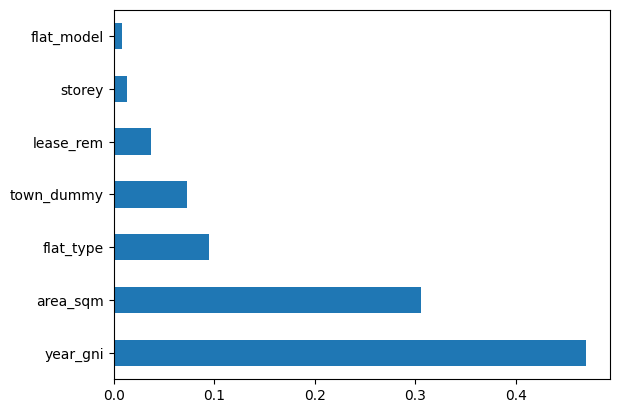

In [ ]:
#Feature Importance for Random Forest
importance1 = ran_forest.feature_importances_
importance2 = ran_forest2.feature_importances_
for i,v in enumerate(importance1):
 print('Feature: %0d, Score: %.5f' % (i,v))

feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind='barh')

Feature: 0, Score: 0.07197
Feature: 1, Score: 0.06708
Feature: 2, Score: 0.01527
Feature: 3, Score: 0.30220
Feature: 4, Score: 0.04716
Feature: 5, Score: 0.02725
Feature: 6, Score: 0.46906


<Axes: >

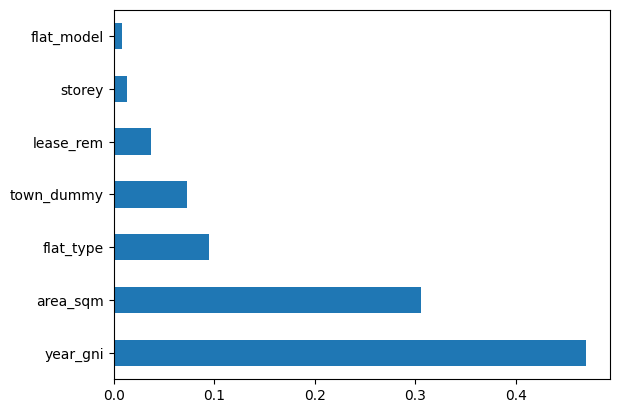

In [ ]:
for i,v in enumerate(importance2):
 print('Feature: %0d, Score: %.5f' % (i,v))

feat_importances = pd.Series(rf.feature_importances_, index=X.columns)
feat_importances.nlargest(7).plot(kind='barh')

<h3><b>3. Neural Network</b></h3>

In [ ]:
MLP_NN = MLPRegressor(activation='relu', hidden_layer_sizes=(40,40,40), max_iter=1500, alpha=1e-6, random_state=101)

MLP_NN.fit(X_train,y_train)
pred_MLP_NN = MLP_NN.predict(X_test)

In [ ]:
MLP_NN2 = MLPRegressor(activation='relu', hidden_layer_sizes=(40,40,40), max_iter=1500, alpha=1e-6, random_state=101)

MLP_NN2.fit(X2_train,y2_train)
pred_MLP_NN2 = MLP_NN2.predict(X2_test)

In [ ]:
pred_MLP_NN

array([225046.25782732,  76470.33385282, 453833.50580044, ...,
       239371.27913707, 130539.25718231, 110399.36197989])

In [ ]:
pred_MLP_NN2

array([192524.55139483,  94378.17134258, 417276.03905601, ...,
       221602.71254318, 106940.43713975, 137005.14946547])

In [ ]:
NN_mse = mean_squared_error(y_test, pred_MLP_NN)
NN_mse2 = mean_squared_error(y2_test, pred_MLP_NN2)
NN_rmse = np.sqrt(NN_mse)
NN_rmse2 = np.sqrt(NN_mse2)

NN_r_squared = r2_score(y_test, pred_MLP_NN)
NN_r_squared2 = r2_score(y2_test, pred_MLP_NN2)

print("neural network (label encoded) r-squared: ", NN_r_squared)
print("neural network (label encoded) rmse: ", NN_rmse)
print("neural network (target encoded) r-squared: ", NN_r_squared2)
print("neural network (target encoded) rmse: ", NN_rmse2)

neural network (label encoded) r-squared:  0.8825751468928223
neural network (label encoded) rmse:  51688.565275381916
neural network (target encoded) r-squared:  0.8556309313357495
neural network (target encoded) rmse:  57312.78890101017


In [ ]:
# compare results
print("linear regression (label encoded) r-squared: ", r_squared)
print("linear regression (label encoded) rmse: ", rmse)
print("linear regression (target encoded) r-squared: ", r_squared2)
print("linear regression (target encoded) rmse: ", rmse2)
print('\n')
print("decision tree (label encoded) r-squared: ", dec_tree_r_squared)
print("decision tree (label encoded) rmse: ", dec_tree_rmse)
print("decision tree (target encoded) r-squared: ", dec_tree_r_squared2)
print("decision tree (target encoded) rmse: ", dec_tree_rmse2)
print('\n')
print("random forest (label encoded) r-squared: ", ran_forest_r_squared)
print("random forest (label encoded) rmse: ", ran_forest_rmse)
print("random forest (target encoded) r-squared: ", ran_forest_r_squared2)
print("random forest (target encoded) rmse: ", ran_forest_rmse2)
print('\n')
print("neural network (label encoded) r-squared: ", NN_r_squared)
print("neural network (label encoded) rmse: ", NN_rmse)
print("neural network (target encoded) r-squared: ", NN_r_squared2)
print("neural network (target encoded) rmse: ", NN_rmse2)

linear regression (label encoded) r-squared:  0.8036807455333612
linear regression (label encoded) rmse:  66833.76278176073
linear regression (target encoded) r-squared:  0.7978189310545998
linear regression (target encoded) rmse:  67824.20454445122


decision tree (label encoded) r-squared:  0.9565434274207174
decision tree (label encoded) rmse:  31444.319473959767
decision tree (target encoded) r-squared:  0.9541438951076759
decision tree (target encoded) rmse:  32300.78268113341


random forest (label encoded) r-squared:  0.9609311957873341
random forest (label encoded) rmse:  29814.636873333875
random forest (target encoded) r-squared:  0.9587536851107117
random forest (target encoded) rmse:  30634.23512166864


neural network (label encoded) r-squared:  0.8825751468928223
neural network (label encoded) rmse:  51688.565275381916
neural network (target encoded) r-squared:  0.8556309313357495
neural network (target encoded) rmse:  57312.78890101017


<h3><b>4. Gradient Boosting Regressor</b></h3>

In [ ]:
GBR = GradientBoostingRegressor(n_estimators=100, max_depth=4, min_samples_split=50, learning_rate=0.01, loss='squared_error', random_state=101)
GBR.fit(X_train, y_train)
pred_GBR = GBR.predict(X_test)

In [ ]:
GBR2 = GradientBoostingRegressor(n_estimators=100, max_depth=4, min_samples_split=50, learning_rate=0.01, loss='squared_error', random_state=101)
GBR2.fit(X2_train, y2_train)
pred_GBR2 = GBR2.predict(X2_test)

In [ ]:
pred_GBR

array([267175.71396918, 210684.5877273 , 429626.08856333, ...,
       265380.32983266, 178396.61558674, 210684.5877273 ])

In [ ]:
pred_GBR2

array([267084.84440192, 210637.05399552, 429452.8279536 , ...,
       265298.96453161, 178354.41710087, 210637.05399552])

In [ ]:
GBR_mse = mean_squared_error(y_test, pred_GBR)
GBR_mse2 = mean_squared_error(y2_test, pred_GBR2)
GBR_rmse = np.sqrt(GBR_mse)
GBR_rmse2 = np.sqrt(GBR_mse2)

GBR_r_squared = r2_score(y_test, pred_GBR)
GBR_r_squared2 = r2_score(y2_test, pred_GBR2)

print("Gradient Boosting Regressor (label encoded) r-squared: ", GBR_r_squared)
print("Gradient Boosting Regressor (label encoded) rmse: ", GBR_rmse)
print("Gradient Boosting Regressor (target encoded) r-squared: ", GBR_r_squared2)
print("Gradient Boosting Regressor (target encoded) rmse: ", GBR_rmse2)

Gradient Boosting Regressor (label encoded) r-squared:  0.7286272503031876
Gradient Boosting Regressor (label encoded) rmse:  78577.38693244162
Gradient Boosting Regressor (target encoded) r-squared:  0.72848270237827
Gradient Boosting Regressor (target encoded) rmse:  78598.31144704924


In [ ]:
# compare results
print("linear regression (label encoded) r-squared: ", r_squared)
print("linear regression (label encoded) rmse: ", rmse)
print("linear regression (target encoded) r-squared: ", r_squared2)
print("linear regression (target encoded) rmse: ", rmse2)
print('\n')
print("decision tree (label encoded) r-squared: ", dec_tree_r_squared)
print("decision tree (label encoded) rmse: ", dec_tree_rmse)
print("decision tree (target encoded) r-squared: ", dec_tree_r_squared2)
print("decision tree (target encoded) rmse: ", dec_tree_rmse2)
print('\n')
print("random forest (label encoded) r-squared: ", ran_forest_r_squared)
print("random forest (label encoded) rmse: ", ran_forest_rmse)
print("random forest (target encoded) r-squared: ", ran_forest_r_squared2)
print("random forest (target encoded) rmse: ", ran_forest_rmse2)
print('\n')
print("neural network (label encoded) r-squared: ", NN_r_squared)
print("neural network (label encoded) rmse: ", NN_rmse)
print("neural network (target encoded) r-squared: ", NN_r_squared2)
print("neural network (target encoded) rmse: ", NN_rmse2)
print('\n')
print("Gradient Boosting Regressor (label encoded) r-squared: ", GBR_r_squared)
print("Gradient Boosting Regressor (label encoded) rmse: ", GBR_rmse)
print("Gradient Boosting Regressor (target encoded) r-squared: ", GBR_r_squared2)
print("Gradient Boosting Regressor (target encoded) rmse: ", GBR_rmse2)

linear regression (label encoded) r-squared:  0.8036807455333612
linear regression (label encoded) rmse:  66833.76278176073
linear regression (target encoded) r-squared:  0.7978189310545998
linear regression (target encoded) rmse:  67824.20454445122


decision tree (label encoded) r-squared:  0.9565434274207174
decision tree (label encoded) rmse:  31444.319473959767
decision tree (target encoded) r-squared:  0.9541438951076759
decision tree (target encoded) rmse:  32300.78268113341


random forest (label encoded) r-squared:  0.9609311957873341
random forest (label encoded) rmse:  29814.636873333875
random forest (target encoded) r-squared:  0.9587536851107117
random forest (target encoded) rmse:  30634.23512166864


neural network (label encoded) r-squared:  0.8825751468928223
neural network (label encoded) rmse:  51688.565275381916
neural network (target encoded) r-squared:  0.8556309313357495
neural network (target encoded) rmse:  57312.78890101017


Gradient Boosting Regressor (labe

<h3><b>5. AdaBoost Regression using decision tree</b></h3>

In [ ]:
Adaboost = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100, learning_rate=0.01, random_state=101)
Adaboost.fit(X_train, y_train)
pred_Adaboost = Adaboost.predict(X_test)

c:\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
Adaboost2 = AdaBoostRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100, learning_rate=0.01, random_state=101)
Adaboost2.fit(X2_train, y2_train)
pred_Adaboost2 = Adaboost2.predict(X2_test)

c:\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
pred_Adaboost

array([253666.66666667,  92000.        , 520000.        , ...,
       220000.        , 191000.        , 113000.        ])

In [ ]:
pred_Adaboost2

array([253666.66666667,  92000.        , 520000.        , ...,
       220000.        , 191000.        , 112800.        ])

In [ ]:
Adaboost_mse = mean_squared_error(y_test, pred_Adaboost)
Adaboost_mse2 = mean_squared_error(y2_test, pred_Adaboost2)
Adaboost_rmse = np.sqrt(Adaboost_mse)
Adaboost_rmse2 = np.sqrt(Adaboost_mse2)

Adaboost_r_squared = r2_score(y_test, pred_Adaboost)
Adaboost_r_squared2 = r2_score(y2_test, pred_Adaboost2)

print("Adaboost (label encoded) r-squared: ", Adaboost_r_squared)
print("Adaboost (label encoded) rmse: ", Adaboost_rmse)
print("Adaboost (target encoded) r-squared: ", Adaboost_r_squared2)
print("Adaboost (target encoded) rmse: ", Adaboost_rmse2)

Adaboost (label encoded) r-squared:  0.9567018994405148
Adaboost (label encoded) rmse:  31386.93349398934
Adaboost (target encoded) r-squared:  0.956474619689426
Adaboost (target encoded) rmse:  31469.20358682898


In [ ]:
# compare results
print("linear regression (label encoded) r-squared: ", r_squared)
print("linear regression (label encoded) rmse: ", rmse)
print("linear regression (target encoded) r-squared: ", r_squared2)
print("linear regression (target encoded) rmse: ", rmse2)
print('\n')
print("decision tree (label encoded) r-squared: ", dec_tree_r_squared)
print("decision tree (label encoded) rmse: ", dec_tree_rmse)
print("decision tree (target encoded) r-squared: ", dec_tree_r_squared2)
print("decision tree (target encoded) rmse: ", dec_tree_rmse2)
print('\n')
print("random forest (label encoded) r-squared: ", ran_forest_r_squared)
print("random forest (label encoded) rmse: ", ran_forest_rmse)
print("random forest (target encoded) r-squared: ", ran_forest_r_squared2)
print("random forest (target encoded) rmse: ", ran_forest_rmse2)
print('\n')
print("neural network (label encoded) r-squared: ", NN_r_squared)
print("neural network (label encoded) rmse: ", NN_rmse)
print("neural network (target encoded) r-squared: ", NN_r_squared2)
print("neural network (target encoded) rmse: ", NN_rmse2)
print('\n')
print("Gradient Boosting Regressor (label encoded) r-squared: ", GBR_r_squared)
print("Gradient Boosting Regressor (label encoded) rmse: ", GBR_rmse)
print("Gradient Boosting Regressor (target encoded) r-squared: ", GBR_r_squared2)
print("Gradient Boosting Regressor (target encoded) rmse: ", GBR_rmse2)
print('\n')
print("Adaboost (label encoded) r-squared: ", Adaboost_r_squared)
print("Adaboost (label encoded) rmse: ", Adaboost_rmse)
print("Adaboost (target encoded) r-squared: ", Adaboost_r_squared2)
print("Adaboost (target encoded) rmse: ", Adaboost_rmse2)

linear regression (label encoded) r-squared:  0.8036807455333612
linear regression (label encoded) rmse:  66833.76278176073
linear regression (target encoded) r-squared:  0.7978189310545998
linear regression (target encoded) rmse:  67824.20454445122


decision tree (label encoded) r-squared:  0.9565434274207174
decision tree (label encoded) rmse:  31444.319473959767
decision tree (target encoded) r-squared:  0.9541438951076759
decision tree (target encoded) rmse:  32300.78268113341


random forest (label encoded) r-squared:  0.9609311957873341
random forest (label encoded) rmse:  29814.636873333875
random forest (target encoded) r-squared:  0.9587536851107117
random forest (target encoded) rmse:  30634.23512166864


neural network (label encoded) r-squared:  0.8825751468928223
neural network (label encoded) rmse:  51688.565275381916
neural network (target encoded) r-squared:  0.8556309313357495
neural network (target encoded) rmse:  57312.78890101017


Gradient Boosting Regressor (labe

In [ ]:
feature_importances = np.mean([
    tree.feature_importances_ for tree in Adaboost.estimators_
], axis=0)

#print(feature_importances)
names1 = list(ds_test)
names1.remove('resale_price')
for i in range(len(names1)):
    print("importance of ", names1[i], ": ", feature_importances[i])

importance of  town_dummy :  0.07270968381271552
importance of  flat_type :  0.0939337722822515
importance of  storey :  0.013498314734754413
importance of  area_sqm :  0.3042301227754543
importance of  flat_model :  0.007901184257933682
importance of  lease_rem :  0.03761780250796118
importance of  year_gni :  0.47010911962892943


In [ ]:
feature_importances2 = np.mean([
    tree.feature_importances_ for tree in Adaboost2.estimators_
], axis=0)

#print(feature_importances)
names2 = list(ds_test2)
names2.remove('resale_price')
for i in range(len(names2)):
    print("importance of ", names2[i], ": ", feature_importances2[i])

importance of  flat_model :  0.07242676160931028
importance of  flat_type :  0.06592204337176727
importance of  town_dummy :  0.015427957474434728
importance of  storey :  0.30168371987445386
importance of  area_sqm :  0.04763977596095823
importance of  lease_rem :  0.02749305859995628
importance of  year_gni :  0.46940668310911937


<h3><b>6. Linear Support Vector Regression</b></h3>

In [ ]:
lin_svr = LinearSVR(random_state=101)
lin_svr.fit(X_train, y_train)
pred_lin_svr = lin_svr.predict(X_test)

c:\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
lin_svr2 = LinearSVR(random_state=101)
lin_svr2.fit(X2_train, y2_train)
pred_lin_svr2 = lin_svr2.predict(X2_test)

c:\Python310\lib\site-packages\sklearn\svm\_base.py:1244: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


In [ ]:
pred_lin_svr

array([288586.53158899, 123560.08155155, 564530.8742271 , ...,
       249046.49659998, 154115.86647293, 159117.66858506])

In [ ]:
pred_lin_svr2

array([487899.21771275, 212017.30482209, 643763.60176033, ...,
       398453.96899077, 330874.08644016, 271549.45366923])

In [ ]:
lin_svr_mse = mean_squared_error(y_test, pred_lin_svr)
lin_svr_mse2 = mean_squared_error(y2_test, pred_lin_svr2)
lin_svr_rmse = np.sqrt(lin_svr_mse)
lin_svr_rmse2 = np.sqrt(lin_svr_mse2)

lin_svr_r_squared = r2_score(y_test, pred_lin_svr)
lin_svr_r_squared2 = r2_score(y2_test, pred_lin_svr2)

print("Linear SVR (label encoded) r-squared: ", lin_svr_r_squared)
print("Linear SVR (label encoded) rmse: ", lin_svr_rmse)
print("Linear SVR (target encoded) r-squared: ", lin_svr_r_squared2) # negative R-squared value shows the model does not follow the trend of the data
print("Linear SVR (target encoded) rmse: ", lin_svr_rmse2)

Linear SVR (label encoded) r-squared:  0.631025328551191
Linear SVR (label encoded) rmse:  91624.73723074733
Linear SVR (target encoded) r-squared:  -0.4019499511279305
Linear SVR (target encoded) rmse:  178599.69780030978


In [ ]:
# compare results
print("linear regression (label encoded) r-squared: ", r_squared)
print("linear regression (label encoded) rmse: ", rmse)
print("linear regression (target encoded) r-squared: ", r_squared2)
print("linear regression (target encoded) rmse: ", rmse2)
print('\n')
print("decision tree (label encoded) r-squared: ", dec_tree_r_squared)
print("decision tree (label encoded) rmse: ", dec_tree_rmse)
print("decision tree (target encoded) r-squared: ", dec_tree_r_squared2)
print("decision tree (target encoded) rmse: ", dec_tree_rmse2)
print('\n')
print("random forest (label encoded) r-squared: ", ran_forest_r_squared)
print("random forest (label encoded) rmse: ", ran_forest_rmse)
print("random forest (target encoded) r-squared: ", ran_forest_r_squared2)
print("random forest (target encoded) rmse: ", ran_forest_rmse2)
print('\n')
print("neural network (label encoded) r-squared: ", NN_r_squared)
print("neural network (label encoded) rmse: ", NN_rmse)
print("neural network (target encoded) r-squared: ", NN_r_squared2)
print("neural network (target encoded) rmse: ", NN_rmse2)
print('\n')
print("Gradient Boosting Regressor (label encoded) r-squared: ", GBR_r_squared)
print("Gradient Boosting Regressor (label encoded) rmse: ", GBR_rmse)
print("Gradient Boosting Regressor (target encoded) r-squared: ", GBR_r_squared2)
print("Gradient Boosting Regressor (target encoded) rmse: ", GBR_rmse2)
print('\n')
print("Adaboost (label encoded) r-squared: ", Adaboost_r_squared)
print("Adaboost (label encoded) rmse: ", Adaboost_rmse)
print("Adaboost (target encoded) r-squared: ", Adaboost_r_squared2)
print("Adaboost (target encoded) rmse: ", Adaboost_rmse2)
print('\n')
print("Linear SVR (label encoded) r-squared: ", lin_svr_r_squared)
print("Linear SVR (label encoded) rmse: ", lin_svr_rmse)
print("Linear SVR (target encoded) r-squared: ", lin_svr_r_squared2)
print("Linear SVR (target encoded) rmse: ", lin_svr_rmse2)

linear regression (label encoded) r-squared:  0.8036807455333612
linear regression (label encoded) rmse:  66833.76278176073
linear regression (target encoded) r-squared:  0.7978189310545998
linear regression (target encoded) rmse:  67824.20454445122


decision tree (label encoded) r-squared:  0.9565434274207174
decision tree (label encoded) rmse:  31444.319473959767
decision tree (target encoded) r-squared:  0.9541438951076759
decision tree (target encoded) rmse:  32300.78268113341


random forest (label encoded) r-squared:  0.9609311957873341
random forest (label encoded) rmse:  29814.636873333875
random forest (target encoded) r-squared:  0.9587536851107117
random forest (target encoded) rmse:  30634.23512166864


neural network (label encoded) r-squared:  0.8825751468928223
neural network (label encoded) rmse:  51688.565275381916
neural network (target encoded) r-squared:  0.8556309313357495
neural network (target encoded) rmse:  57312.78890101017


Gradient Boosting Regressor (labe

<h3><b>7. KNN Regression</b></h3>

In [ ]:
#getting rmse value
from sklearn import neighbors
from sklearn.metrics import mean_squared_error 
from math import sqrt
rmse_val = [] #to store rmse values for different k
for K in range(20):
    K = K+1
    model = neighbors.KNeighborsRegressor(n_neighbors = K)
    model.fit(X_train, y_train)  #fit the model
    pred=model.predict(X_test) #make prediction on test set
    error = sqrt(mean_squared_error(y_test,pred)) #calculate rmse
    rmse_val.append(error) #store rmse values
    print('RMSE value for k= ' , K , 'is:', error)

In [ ]:
#plotting the rmse values against k values
curve = pd.DataFrame(rmse_val) #elbow curve 
curve.plot()
curve.min()
#we choose the value of K to be 5 

In [ ]:
KNNR = KNeighborsRegressor(n_neighbors=5, weights='uniform', leaf_size=30)
KNNR.fit(X_train, y_train)
pred_KNNR = KNNR.predict(X_test)

In [ ]:
KNNR2 = KNeighborsRegressor(n_neighbors=5, weights='uniform', leaf_size=30)
KNNR2.fit(X2_train, y2_train)
pred_KNNR2 = KNNR2.predict(X2_test)

In [ ]:
pred_KNNR

array([233000.,  89400., 492600., ..., 244400., 146000., 113600.])

In [ ]:
pred_KNNR2

array([230600. ,  84200. , 515777.6, ..., 255200. , 152200. , 113600. ])

In [ ]:
KNNR_mse = mean_squared_error(y_test, pred_KNNR)
KNNR_mse2 = mean_squared_error(y2_test, pred_KNNR2)
KNNR_rmse = np.sqrt(KNNR_mse)
KNNR_rmse2 = np.sqrt(KNNR_mse2)

KNNR_r_squared = r2_score(y_test, pred_KNNR)
KNNR_r_squared2 = r2_score(y2_test, pred_KNNR2)

print("KNN Regression (label encoded) r-squared: ", KNNR_r_squared)
print("KNN Regression (label encoded) SVR rmse: ", KNNR_rmse)
print("KNN Regression (target encoded) r-squared: ", KNNR_r_squared2)
print("KNN Regression (target encoded) SVR rmse: ", KNNR_rmse2)

KNN Regression (label encoded) r-squared:  0.9400036948746453
KNN Regression (label encoded) SVR rmse:  36946.790446610954
KNN Regression (target encoded) r-squared:  0.9525173995400726
KNN Regression (target encoded) SVR rmse:  32868.63833095722


In [ ]:
# compare results
print("linear regression (label encoded) r-squared: ", r_squared)
print("linear regression (label encoded) rmse: ", rmse)
print("linear regression (target encoded) r-squared: ", r_squared2)
print("linear regression (target encoded) rmse: ", rmse2)
print('\n')
print("decision tree (label encoded) r-squared: ", dec_tree_r_squared)
print("decision tree (label encoded) rmse: ", dec_tree_rmse)
print("decision tree (target encoded) r-squared: ", dec_tree_r_squared2)
print("decision tree (target encoded) rmse: ", dec_tree_rmse2)
print('\n')
print("random forest (label encoded) r-squared: ", ran_forest_r_squared)
print("random forest (label encoded) rmse: ", ran_forest_rmse)
print("random forest (target encoded) r-squared: ", ran_forest_r_squared2)
print("random forest (target encoded) rmse: ", ran_forest_rmse2)
print('\n')
print("neural network (label encoded) r-squared: ", NN_r_squared)
print("neural network (label encoded) rmse: ", NN_rmse)
print("neural network (target encoded) r-squared: ", NN_r_squared2)
print("neural network (target encoded) rmse: ", NN_rmse2)
print('\n')
print("Gradient Boosting Regressor (label encoded) r-squared: ", GBR_r_squared)
print("Gradient Boosting Regressor (label encoded) rmse: ", GBR_rmse)
print("Gradient Boosting Regressor (target encoded) r-squared: ", GBR_r_squared2)
print("Gradient Boosting Regressor (target encoded) rmse: ", GBR_rmse2)
print('\n')
print("Adaboost (label encoded) r-squared: ", Adaboost_r_squared)
print("Adaboost (label encoded) rmse: ", Adaboost_rmse)
print("Adaboost (target encoded) r-squared: ", Adaboost_r_squared2)
print("Adaboost (target encoded) rmse: ", Adaboost_rmse2)
print('\n')
print("Linear SVR (label encoded) r-squared: ", lin_svr_r_squared)
print("Linear SVR (label encoded) rmse: ", lin_svr_rmse)
print("Linear SVR (target encoded) r-squared: ", lin_svr_r_squared2)
print("Linear SVR (target encoded) rmse: ", lin_svr_rmse2)
print('\n')
print("KNN Regression (label encoded) r-squared: ", KNNR_r_squared)
print("KNN Regression (label encoded) SVR rmse: ", KNNR_rmse)
print("KNN Regression (target encoded) r-squared: ", KNNR_r_squared2)
print("KNN Regression (target encoded) SVR rmse: ", KNNR_rmse2)

linear regression (label encoded) r-squared:  0.8036807455333612
linear regression (label encoded) rmse:  66833.76278176073
linear regression (target encoded) r-squared:  0.7978189310545998
linear regression (target encoded) rmse:  67824.20454445122


decision tree (label encoded) r-squared:  0.9565434274207174
decision tree (label encoded) rmse:  31444.319473959767
decision tree (target encoded) r-squared:  0.9541438951076759
decision tree (target encoded) rmse:  32300.78268113341


random forest (label encoded) r-squared:  0.9609311957873341
random forest (label encoded) rmse:  29814.636873333875
random forest (target encoded) r-squared:  0.9587536851107117
random forest (target encoded) rmse:  30634.23512166864


neural network (label encoded) r-squared:  0.8825751468928223
neural network (label encoded) rmse:  51688.565275381916
neural network (target encoded) r-squared:  0.8556309313357495
neural network (target encoded) rmse:  57312.78890101017


Gradient Boosting Regressor (labe

<h3><b>8. XGBoost</b></h3>

In [ ]:
XGB = xg.XGBRegressor(objective ='reg:linear', n_estimators = 100, seed = 101)
XGB.fit(X_train, y_train)
pred_XGB = XGB.predict(X_test)

[12:40:55] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
XGB2 = xg.XGBRegressor(objective ='reg:linear', n_estimators = 100, seed = 101)
XGB2.fit(X2_train, y2_train)
pred_XGB2 = XGB2.predict(X2_test)

[12:41:16] WARNING: /Users/runner/work/xgboost/xgboost/python-package/build/temp.macosx-10.9-x86_64-cpython-38/xgboost/src/objective/regression_obj.cu:213: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
pred_XGB

array([203364.11,  80370.39, 410036.2 , ..., 246076.73, 150973.03,
       116045.31], dtype=float32)

In [ ]:
pred_XGB2

array([197411.23 ,  87037.3  , 407543.16 , ..., 242452.25 , 148897.94 ,
       120279.945], dtype=float32)

In [ ]:
XGB_mse = mean_squared_error(y_test, pred_XGB)
XGB_mse2 = mean_squared_error(y2_test, pred_XGB2)
XGB_rmse = np.sqrt(XGB_mse)
XGB_rmse2 = np.sqrt(XGB_mse2)

XGB_r_squared = r2_score(y_test, pred_XGB)
XGB_r_squared2 = r2_score(y2_test, pred_XGB2)

print("XGBoost (label encoded) r-squared: ", XGB_r_squared)
print("XGBoost (label encoded) SVR rmse: ", XGB_rmse)
print("XGBoost (target encoded) r-squared: ", XGB_r_squared2)
print("XGBoost (target encoded) SVR rmse: ", XGB_rmse2)

XGBoost (label encoded) r-squared:  0.9549743061596332
XGBoost (label encoded) SVR rmse:  32006.978032459054
XGBoost (target encoded) r-squared:  0.954537060697971
XGBoost (target encoded) SVR rmse:  32162.012774472492


In [ ]:
# compare results
print("linear regression (label encoded) r-squared: ", r_squared)
print("linear regression (label encoded) rmse: ", rmse)
print("linear regression (target encoded) r-squared: ", r_squared2)
print("linear regression (target encoded) rmse: ", rmse2)
print('\n')
print("decision tree (label encoded) r-squared: ", dec_tree_r_squared)
print("decision tree (label encoded) rmse: ", dec_tree_rmse)
print("decision tree (target encoded) r-squared: ", dec_tree_r_squared2)
print("decision tree (target encoded) rmse: ", dec_tree_rmse2)
print('\n')
print("random forest (label encoded) r-squared: ", ran_forest_r_squared)
print("random forest (label encoded) rmse: ", ran_forest_rmse)
print("random forest (target encoded) r-squared: ", ran_forest_r_squared2)
print("random forest (target encoded) rmse: ", ran_forest_rmse2)
print('\n')
print("neural network (label encoded) r-squared: ", NN_r_squared)
print("neural network (label encoded) rmse: ", NN_rmse)
print("neural network (target encoded) r-squared: ", NN_r_squared2)
print("neural network (target encoded) rmse: ", NN_rmse2)
print('\n')
print("Gradient Boosting Regressor (label encoded) r-squared: ", GBR_r_squared)
print("Gradient Boosting Regressor (label encoded) rmse: ", GBR_rmse)
print("Gradient Boosting Regressor (target encoded) r-squared: ", GBR_r_squared2)
print("Gradient Boosting Regressor (target encoded) rmse: ", GBR_rmse2)
print('\n')
print("Adaboost (label encoded) r-squared: ", Adaboost_r_squared)
print("Adaboost (label encoded) rmse: ", Adaboost_rmse)
print("Adaboost (target encoded) r-squared: ", Adaboost_r_squared2)
print("Adaboost (target encoded) rmse: ", Adaboost_rmse2)
print('\n')
print("Linear SVR (label encoded) r-squared: ", lin_svr_r_squared)
print("Linear SVR (label encoded) rmse: ", lin_svr_rmse)
print("Linear SVR (target encoded) r-squared: ", lin_svr_r_squared2)
print("Linear SVR (target encoded) rmse: ", lin_svr_rmse2)
print('\n')
print("KNN Regression (label encoded) r-squared: ", KNNR_r_squared)
print("KNN Regression (label encoded) SVR rmse: ", KNNR_rmse)
print("KNN Regression (target encoded) r-squared: ", KNNR_r_squared2)
print("KNN Regression (target encoded) SVR rmse: ", KNNR_rmse2)
print('\n')
print("XGBoost (label encoded) r-squared: ", XGB_r_squared)
print("XGBoost (label encoded) SVR rmse: ", XGB_rmse)
print("XGBoost (target encoded) r-squared: ", XGB_r_squared2)
print("XGBoost (target encoded) SVR rmse: ", XGB_rmse2)

linear regression (label encoded) r-squared:  0.8036807455333612
linear regression (label encoded) rmse:  66833.76278176073
linear regression (target encoded) r-squared:  0.7978189310545998
linear regression (target encoded) rmse:  67824.20454445122


decision tree (label encoded) r-squared:  0.9565434274207174
decision tree (label encoded) rmse:  31444.319473959767
decision tree (target encoded) r-squared:  0.9541438951076759
decision tree (target encoded) rmse:  32300.78268113341


random forest (label encoded) r-squared:  0.9609311957873341
random forest (label encoded) rmse:  29814.636873333875
random forest (target encoded) r-squared:  0.9587536851107117
random forest (target encoded) rmse:  30634.23512166864


neural network (label encoded) r-squared:  0.8825751468928223
neural network (label encoded) rmse:  51688.565275381916
neural network (target encoded) r-squared:  0.8556309313357495
neural network (target encoded) rmse:  57312.78890101017


Gradient Boosting Regressor (labe

<h3><b>9. Ridge Regression</b></h3>

In [ ]:
ridge = Ridge(alpha=1.0, max_iter=1500, random_state=101)
ridge.fit(X_train, y_train)
pred_ridge = ridge.predict(X_test)

In [ ]:
ridge2 = Ridge(alpha=1.0, max_iter=1500, random_state=101)
ridge2.fit(X2_train, y2_train)
pred_ridge2 = ridge2.predict(X2_test)

In [ ]:
pred_ridge

array([241810.62302223,  35550.64714612, 470989.9037816 , ...,
       262646.40346873, 237782.41538247, 124808.25795907])

In [ ]:
pred_ridge2

array([246595.84987064,  28762.18336263, 479738.32029892, ...,
       262811.40822545, 246501.07810089, 121669.01716612])

In [ ]:
ridge_mse = mean_squared_error(y_test, pred_ridge)
ridge_mse2 = mean_squared_error(y2_test, pred_ridge2)
ridge_rmse = np.sqrt(ridge_mse)
ridge_rmse2 = np.sqrt(ridge_mse2)

ridge_r_squared = r2_score(y_test, pred_ridge)
ridge_r_squared2 = r2_score(y2_test, pred_ridge2)

print("Ridge Regression (label encoded) r-squared: ", ridge_r_squared)
print("Ridge Regression (label encoded) rmse: ", ridge_rmse)
print("Ridge Regression (target encoded) r-squared: ", ridge_r_squared2)
print("Ridge Regression (target encoded) rmse: ", ridge_rmse2)

Ridge Regression (label encoded) r-squared:  0.8036807446465423
Ridge Regression (label encoded) rmse:  66833.76293271242
Ridge Regression (target encoded) r-squared:  0.7978189435196863
Ridge Regression (target encoded) rmse:  67824.20245366548


In [ ]:
# compare results
print("linear regression (label encoded) r-squared: ", r_squared)
print("linear regression (label encoded) rmse: ", rmse)
print("linear regression (target encoded) r-squared: ", r_squared2)
print("linear regression (target encoded) rmse: ", rmse2)
print('\n')
print("decision tree (label encoded) r-squared: ", dec_tree_r_squared)
print("decision tree (label encoded) rmse: ", dec_tree_rmse)
print("decision tree (target encoded) r-squared: ", dec_tree_r_squared2)
print("decision tree (target encoded) rmse: ", dec_tree_rmse2)
print('\n')
print("random forest (label encoded) r-squared: ", ran_forest_r_squared)
print("random forest (label encoded) rmse: ", ran_forest_rmse)
print("random forest (target encoded) r-squared: ", ran_forest_r_squared2)
print("random forest (target encoded) rmse: ", ran_forest_rmse2)
print('\n')
print("neural network (label encoded) r-squared: ", NN_r_squared)
print("neural network (label encoded) rmse: ", NN_rmse)
print("neural network (target encoded) r-squared: ", NN_r_squared2)
print("neural network (target encoded) rmse: ", NN_rmse2)
print('\n')
print("Gradient Boosting Regressor (label encoded) r-squared: ", GBR_r_squared)
print("Gradient Boosting Regressor (label encoded) rmse: ", GBR_rmse)
print("Gradient Boosting Regressor (target encoded) r-squared: ", GBR_r_squared2)
print("Gradient Boosting Regressor (target encoded) rmse: ", GBR_rmse2)
print('\n')
print("Adaboost (label encoded) r-squared: ", Adaboost_r_squared)
print("Adaboost (label encoded) rmse: ", Adaboost_rmse)
print("Adaboost (target encoded) r-squared: ", Adaboost_r_squared2)
print("Adaboost (target encoded) rmse: ", Adaboost_rmse2)
print('\n')
print("Linear SVR (label encoded) r-squared: ", lin_svr_r_squared)
print("Linear SVR (label encoded) rmse: ", lin_svr_rmse)
print("Linear SVR (target encoded) r-squared: ", lin_svr_r_squared2)
print("Linear SVR (target encoded) rmse: ", lin_svr_rmse2)
print('\n')
print("KNN Regression (label encoded) r-squared: ", KNNR_r_squared)
print("KNN Regression (label encoded) SVR rmse: ", KNNR_rmse)
print("KNN Regression (target encoded) r-squared: ", KNNR_r_squared2)
print("KNN Regression (target encoded) SVR rmse: ", KNNR_rmse2)
print('\n')
print("XGBoost (label encoded) r-squared: ", XGB_r_squared)
print("XGBoost (label encoded) SVR rmse: ", XGB_rmse)
print("XGBoost (target encoded) r-squared: ", XGB_r_squared2)
print("XGBoost (target encoded) SVR rmse: ", XGB_rmse2)
print('\n')
print("Ridge Regression (label encoded) r-squared: ", ridge_r_squared)
print("Ridge Regression (label encoded) rmse: ", ridge_rmse)
print("Ridge Regression (target encoded) r-squared: ", ridge_r_squared2)
print("Ridge Regression (target encoded) rmse: ", ridge_rmse2)

linear regression (label encoded) r-squared:  0.8036807455333612
linear regression (label encoded) rmse:  66833.76278176073
linear regression (target encoded) r-squared:  0.7978189310545998
linear regression (target encoded) rmse:  67824.20454445122


decision tree (label encoded) r-squared:  0.9565434274207174
decision tree (label encoded) rmse:  31444.319473959767
decision tree (target encoded) r-squared:  0.9541438951076759
decision tree (target encoded) rmse:  32300.78268113341


random forest (label encoded) r-squared:  0.9609311957873341
random forest (label encoded) rmse:  29814.636873333875
random forest (target encoded) r-squared:  0.9587536851107117
random forest (target encoded) rmse:  30634.23512166864


neural network (label encoded) r-squared:  0.8825751468928223
neural network (label encoded) rmse:  51688.565275381916
neural network (target encoded) r-squared:  0.8556309313357495
neural network (target encoded) rmse:  57312.78890101017


Gradient Boosting Regressor (labe

<h3><b>10. Lasso Regression</b></h3>

In [ ]:
lasso = Lasso(alpha=1.0, max_iter=1500, random_state=101)
lasso.fit(X_train, y_train)
pred_lasso = lasso.predict(X_test)

In [ ]:
lasso2 = Lasso(alpha=1.0, max_iter=1500, random_state=101)
lasso2.fit(X2_train, y2_train)
pred_lasso2 = lasso2.predict(X2_test)

In [ ]:
pred_lasso

array([241810.75874691,  35551.00586165, 470989.53009961, ...,
       262646.63204662, 237779.56078138, 124805.53836659])

In [ ]:
pred_lasso2

array([246617.46873291,  28856.58156075, 479732.97645157, ...,
       262805.97418495, 246490.03508328, 121654.68536421])

In [ ]:
lasso_mse = mean_squared_error(y_test, pred_lasso)
lasso_mse2 = mean_squared_error(y2_test, pred_lasso2)
lasso_rmse = np.sqrt(lasso_mse)
lasso_rmse2 = np.sqrt(lasso_mse2)

lasso_r_squared = r2_score(y_test, pred_lasso)
lasso_r_squared2 = r2_score(y2_test, pred_lasso2)

print("Lasso Regression (label encoded) r-squared: ", lasso_r_squared)
print("Lasso Regression (label encoded) rmse: ", lasso_rmse)
print("Lasso Regression (target encoded) r-squared: ", lasso_r_squared2)
print("Lasso Regression (target encoded) rmse: ", lasso_rmse2)

Lasso Regression (label encoded) r-squared:  0.8036807194715441
Lasso Regression (label encoded) rmse:  66833.76721792582
Lasso Regression (target encoded) r-squared:  0.7978190742045744
Lasso Regression (target encoded) rmse:  67824.18053370944


In [ ]:
# compare results
print("linear regression (label encoded) r-squared: ", r_squared)
print("linear regression (label encoded) rmse: ", rmse)
print("linear regression (target encoded) r-squared: ", r_squared2)
print("linear regression (target encoded) rmse: ", rmse2)
print('\n')
print("decision tree (label encoded) r-squared: ", dec_tree_r_squared)
print("decision tree (label encoded) rmse: ", dec_tree_rmse)
print("decision tree (target encoded) r-squared: ", dec_tree_r_squared2)
print("decision tree (target encoded) rmse: ", dec_tree_rmse2)
print('\n')
print("random forest (label encoded) r-squared: ", ran_forest_r_squared)
print("random forest (label encoded) rmse: ", ran_forest_rmse)
print("random forest (target encoded) r-squared: ", ran_forest_r_squared2)
print("random forest (target encoded) rmse: ", ran_forest_rmse2)
print('\n')
print("neural network (label encoded) r-squared: ", NN_r_squared)
print("neural network (label encoded) rmse: ", NN_rmse)
print("neural network (target encoded) r-squared: ", NN_r_squared2)
print("neural network (target encoded) rmse: ", NN_rmse2)
print('\n')
print("Gradient Boosting Regressor (label encoded) r-squared: ", GBR_r_squared)
print("Gradient Boosting Regressor (label encoded) rmse: ", GBR_rmse)
print("Gradient Boosting Regressor (target encoded) r-squared: ", GBR_r_squared2)
print("Gradient Boosting Regressor (target encoded) rmse: ", GBR_rmse2)
print('\n')
print("Adaboost (label encoded) r-squared: ", Adaboost_r_squared)
print("Adaboost (label encoded) rmse: ", Adaboost_rmse)
print("Adaboost (target encoded) r-squared: ", Adaboost_r_squared2)
print("Adaboost (target encoded) rmse: ", Adaboost_rmse2)
print('\n')
print("Linear SVR (label encoded) r-squared: ", lin_svr_r_squared)
print("Linear SVR (label encoded) rmse: ", lin_svr_rmse)
print("Linear SVR (target encoded) r-squared: ", lin_svr_r_squared2)
print("Linear SVR (target encoded) rmse: ", lin_svr_rmse2)
print('\n')
print("KNN Regression (label encoded) r-squared: ", KNNR_r_squared)
print("KNN Regression (label encoded) SVR rmse: ", KNNR_rmse)
print("KNN Regression (target encoded) r-squared: ", KNNR_r_squared2)
print("KNN Regression (target encoded) SVR rmse: ", KNNR_rmse2)
print('\n')
print("XGBoost (label encoded) r-squared: ", XGB_r_squared)
print("XGBoost (label encoded) SVR rmse: ", XGB_rmse)
print("XGBoost (target encoded) r-squared: ", XGB_r_squared2)
print("XGBoost (target encoded) SVR rmse: ", XGB_rmse2)
print('\n')
print("Ridge Regression (label encoded) r-squared: ", ridge_r_squared)
print("Ridge Regression (label encoded) rmse: ", ridge_rmse)
print("Ridge Regression (target encoded) r-squared: ", ridge_r_squared2)
print("Ridge Regression (target encoded) rmse: ", ridge_rmse2)
print('\n')
print("Lasso Regression (label encoded) r-squared: ", lasso_r_squared)
print("Lasso Regression (label encoded) rmse: ", lasso_rmse)
print("Lasso Regression (target encoded) r-squared: ", lasso_r_squared2)
print("Lasso Regression (target encoded) rmse: ", lasso_rmse2)

linear regression (label encoded) r-squared:  0.8036807455333612
linear regression (label encoded) rmse:  66833.76278176073
linear regression (target encoded) r-squared:  0.7978189310545998
linear regression (target encoded) rmse:  67824.20454445122


decision tree (label encoded) r-squared:  0.9565434274207174
decision tree (label encoded) rmse:  31444.319473959767
decision tree (target encoded) r-squared:  0.9541438951076759
decision tree (target encoded) rmse:  32300.78268113341


random forest (label encoded) r-squared:  0.9609311957873341
random forest (label encoded) rmse:  29814.636873333875
random forest (target encoded) r-squared:  0.9587536851107117
random forest (target encoded) rmse:  30634.23512166864


neural network (label encoded) r-squared:  0.8825751468928223
neural network (label encoded) rmse:  51688.565275381916
neural network (target encoded) r-squared:  0.8556309313357495
neural network (target encoded) rmse:  57312.78890101017


Gradient Boosting Regressor (labe

<h3><b>11. Bagging Regression</b></h3>

In [ ]:
bag = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100, random_state=101)
bag.fit(X_train, y_train)
pred_bag = bag.predict(X_test)

c:\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
bag2 = BaggingRegressor(base_estimator=DecisionTreeRegressor(), n_estimators=100, random_state=101)
bag2.fit(X2_train, y2_train)
pred_bag2 = bag2.predict(X2_test)

c:\Python310\lib\site-packages\sklearn\ensemble\_base.py:166: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


In [ ]:
pred_bag

array([253733.4047619 ,  88627.66666667, 515331.89587302, ...,
       233852.72280497, 170366.76587302, 113174.24404762])

In [ ]:
pred_bag2

array([253733.4047619 ,  87900.16666667, 516399.34730159, ...,
       232660.248446  , 173866.51587302, 113174.24404762])

In [ ]:
bag_mse = mean_squared_error(y_test, pred_bag)
bag_mse2 = mean_squared_error(y2_test, pred_bag2)
bag_rmse = np.sqrt(bag_mse)
bag_rmse2 = np.sqrt(bag_mse2)

bag_r_squared = r2_score(y_test, pred_bag)
bag_r_squared2 = r2_score(y2_test, pred_bag2)

print("Bagging Regression (label encoded) r-squared: ", bag_r_squared)
print("Bagging Regression (label encoded) rmse: ", bag_rmse)
print("Bagging Regression (target encoded) r-squared: ", bag_r_squared2)
print("Bagging Regression (target encoded) rmse: ", bag_rmse2)

Bagging Regression (label encoded) r-squared:  0.9609176186339373
Bagging Regression (label encoded) rmse:  29819.817000340863
Bagging Regression (target encoded) r-squared:  0.9609457340832479
Bagging Regression (target encoded) rmse:  29809.089041068095


In [ ]:
# compare results
print("linear regression (label encoded) r-squared: ", r_squared)
print("linear regression (label encoded) rmse: ", rmse)
print("linear regression (target encoded) r-squared: ", r_squared2)
print("linear regression (target encoded) rmse: ", rmse2)
print('\n')
print("decision tree (label encoded) r-squared: ", dec_tree_r_squared)
print("decision tree (label encoded) rmse: ", dec_tree_rmse)
print("decision tree (target encoded) r-squared: ", dec_tree_r_squared2)
print("decision tree (target encoded) rmse: ", dec_tree_rmse2)
print('\n')
print("random forest (label encoded) r-squared: ", ran_forest_r_squared)
print("random forest (label encoded) rmse: ", ran_forest_rmse)
print("random forest (target encoded) r-squared: ", ran_forest_r_squared2)
print("random forest (target encoded) rmse: ", ran_forest_rmse2)
print('\n')
print("neural network (label encoded) r-squared: ", NN_r_squared)
print("neural network (label encoded) rmse: ", NN_rmse)
print("neural network (target encoded) r-squared: ", NN_r_squared2)
print("neural network (target encoded) rmse: ", NN_rmse2)
print('\n')
print("Gradient Boosting Regressor (label encoded) r-squared: ", GBR_r_squared)
print("Gradient Boosting Regressor (label encoded) rmse: ", GBR_rmse)
print("Gradient Boosting Regressor (target encoded) r-squared: ", GBR_r_squared2)
print("Gradient Boosting Regressor (target encoded) rmse: ", GBR_rmse2)
print('\n')
print("Adaboost (label encoded) r-squared: ", Adaboost_r_squared)
print("Adaboost (label encoded) rmse: ", Adaboost_rmse)
print("Adaboost (target encoded) r-squared: ", Adaboost_r_squared2)
print("Adaboost (target encoded) rmse: ", Adaboost_rmse2)
print('\n')
print("Linear SVR (label encoded) r-squared: ", lin_svr_r_squared)
print("Linear SVR (label encoded) rmse: ", lin_svr_rmse)
print("Linear SVR (target encoded) r-squared: ", lin_svr_r_squared2)
print("Linear SVR (target encoded) rmse: ", lin_svr_rmse2)
print('\n')
print("KNN Regression (label encoded) r-squared: ", KNNR_r_squared)
print("KNN Regression (label encoded) SVR rmse: ", KNNR_rmse)
print("KNN Regression (target encoded) r-squared: ", KNNR_r_squared2)
print("KNN Regression (target encoded) SVR rmse: ", KNNR_rmse2)
print('\n')
print("XGBoost (label encoded) r-squared: ", XGB_r_squared)
print("XGBoost (label encoded) SVR rmse: ", XGB_rmse)
print("XGBoost (target encoded) r-squared: ", XGB_r_squared2)
print("XGBoost (target encoded) SVR rmse: ", XGB_rmse2)
print('\n')
print("Ridge Regression (label encoded) r-squared: ", ridge_r_squared)
print("Ridge Regression (label encoded) rmse: ", ridge_rmse)
print("Ridge Regression (target encoded) r-squared: ", ridge_r_squared2)
print("Ridge Regression (target encoded) rmse: ", ridge_rmse2)
print('\n')
print("Lasso Regression (label encoded) r-squared: ", lasso_r_squared)
print("Lasso Regression (label encoded) rmse: ", lasso_rmse)
print("Lasso Regression (target encoded) r-squared: ", lasso_r_squared2)
print("Lasso Regression (target encoded) rmse: ", lasso_rmse2)
print('\n')
print("Bagging Regression (label encoded) r-squared: ", bag_r_squared)
print("Bagging Regression (label encoded) rmse: ", bag_rmse)
print("Bagging Regression (target encoded) r-squared: ", bag_r_squared2)
print("Bagging Regression (target encoded) rmse: ", bag_rmse2)

linear regression (label encoded) r-squared:  0.8036807455333612
linear regression (label encoded) rmse:  66833.76278176073
linear regression (target encoded) r-squared:  0.7978189310545998
linear regression (target encoded) rmse:  67824.20454445122


decision tree (label encoded) r-squared:  0.9565434274207174
decision tree (label encoded) rmse:  31444.319473959767
decision tree (target encoded) r-squared:  0.9541438951076759
decision tree (target encoded) rmse:  32300.78268113341


random forest (label encoded) r-squared:  0.9609311957873341
random forest (label encoded) rmse:  29814.636873333875
random forest (target encoded) r-squared:  0.9587536851107117
random forest (target encoded) rmse:  30634.23512166864


neural network (label encoded) r-squared:  0.8825751468928223
neural network (label encoded) rmse:  51688.565275381916
neural network (target encoded) r-squared:  0.8556309313357495
neural network (target encoded) rmse:  57312.78890101017


Gradient Boosting Regressor (labe

In [ ]:
feature_importances = np.mean([
    tree.feature_importances_ for tree in bag.estimators_
], axis=0)

In [ ]:
#print(feature_importances)
names1 = list(ds_test)
names1.remove('resale_price')
for i in range(len(names1)):
    print("importance of ", names1[i], ": ", feature_importances[i])

importance of  town_dummy :  0.07228525888075855
importance of  flat_type :  0.0943854716654935
importance of  storey :  0.013369558193710149
importance of  area_sqm :  0.3049282318282863
importance of  flat_model :  0.007879153239031527
importance of  lease_rem :  0.037294798752531555
importance of  year_gni :  0.46985752744018855


In [ ]:
feature_importances2 = np.mean([
    tree.feature_importances_ for tree in bag2.estimators_
], axis=0)

In [ ]:
names2 = list(ds_test2)
names2.remove('resale_price')
for i in range(len(names2)):
    print("importance of ", names2[i], ": ", feature_importances2[i])

importance of  flat_model :  0.07197408347000278
importance of  flat_type :  0.06709219206665976
importance of  town_dummy :  0.015274728532164541
importance of  storey :  0.30219705238449135
importance of  area_sqm :  0.04714998695552078
importance of  lease_rem :  0.02725196520046985
importance of  year_gni :  0.46905999139069093
